In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

    
import lidg

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# --- make instance ---
s0 = lidg.linear_span.LinearSpan("s0")

# --- read a text file or pandas DataFrame ---
s0.read("database/binary_alloy/alloy.dat")
s0.show()

# --- divide a target vector y ---
s0.set_y("M")


# --- add a constant vector "const"---
s0.add_const()
s0.show()

# --- change descriptor labels ---
s0.change_labels("x")

s0.show()

.read: text file
  .label_check

.show: s0 ( 8 )
  ['M', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    0  M
    1  x
    2  MA
    3  ZA
    4  MB
    5  ZB
    6  MAB
    7  MBA

.set_y:  
  s0.y     <---  'M'  in  s0 ( 8 )
  s0 ( 8 )   -   'M' 
  s0 ( 7 )

.add_const:  
  s0 ( 7 )   +   const ( 1 ) 
  s0 ( 8 )

.show: s0 ( 8 )
  ['const', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    0  const
    1  x
    2  MA
    3  ZA
    4  MB
    5  ZB
    6  MAB
    7  MBA

.change_labels: from x0
    0   x0   <---   const
    1   x1   <---   x
    2   x2   <---   MA
    3   x3   <---   ZA
    4   x4   <---   MB
    5   x5   <---   ZB
    6   x6   <---   MAB
    7   x7   <---   MBA
.save:  
  s0 ( 8 )  --->  s0_save ( 8 )
  s0 ( 8 )         s0_save ( 8 )

.show: s0 ( 8 )
  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
    0  x0      (  =  const  )
    1  x1      (  =  x  )
    2  x2      (  =  MA  )
    3  x3      (  =  ZA  )
    4  x4      (  =  MB  )
    5  x5      (  =  ZB  )
    6  x6 

In [3]:
s0_sub = s0.sub(['x2', 'x3', 'x4', 'x5', 'x6', 'x7'],"s0_sub")
s0_sub_bo = s0_sub.gen_bo(["a","a+","a-"],"s0_sub_bo")
s1 = s0.join(s0_sub_bo,"s1")

.sub:  ['x2', 'x3', 'x4', 'x5', 'x6', 'x7']
  s0_sub ( 6 )  <---  s0 ( 6 )  in  s0 ( 8 )

Descriptor generation by basic operations:
  'a' : n = 6
  'a+' : 6C2 = 15
  'a-' : 6C2 = 15
  # of generated new descriptors: 36
.gen_bo:  ['a', 'a+', 'a-']
  s0_sub_bo ( 36 )  <---  s0_sub ( 6 )

.join:  
  s1 (44)  <---  s0 ( 8 )   +   s0_sub_bo ( 36 )



In [4]:
#s1_lid = s1.lid(spn_name="s_lid",normalize=False,tole1=None,tole2=None)
s1_lid = s1.lid(spn_name="s1_lid")

Find and remove multicollinearities:
  normalize = False
  coefficients are for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 44)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 1.4589124023799135e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 10
                   rk_rref = 10
# of non-trivial solutions: 34 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 6, 33, 17, 28, 40, 35, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43]
Space index: [ extra basis, [ basis ] ]
[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43, [0, 1, 2, 3, 6, 33, 17, 28, 40, 35]]

The form of multi-correlated descriptors
1 : x4 = (2.26)x0
2 : x5 = (8.0)x0
3 :

Ordinary Least Squares regression:
  normalize = False
  coefficients are for descriptors with original scale

  e2 =  6.026001
  mse =  0.060869
  rmse =  0.246716
  R2 =  0.906386
  eq2 =  7.552861
  mseq =  0.076292
  rmseq =  0.276209
  Q2 =  0.882666

  TR2, TQ2, AIC =  0.971003,   0.963655,   23.845240

       Label        b      |b|  -log10(p)       G2      TRi2
1         x0 -3.73511  3.73511    0.25733  0.00397  0.999983
2         x1  1.97389  1.97389   39.72684  0.86488  0.714286
3         x2  1.25640  1.25640    0.49764  0.01121  0.999076
4         x3  0.12426  0.12426    0.35749  0.00674  0.999585
5         x6 -0.50106  0.50106    0.21362  0.00291  0.999487
6   a(x2-x7)  0.41353  0.41353    0.35466  0.00666  0.998707
7   a(x2+x6)  0.27224  0.27224    0.24963  0.00378  0.998668
8   a(x6+x7)  0.12746  0.12746    0.17879  0.00215  0.998369
9   a(x4-x7)  0.23932  0.23932    0.27455  0.00442  0.997992
10  a(x3-x5)  0.44831  0.44831    0.20938  0.00281  0.999909

hy = (-3.735)x0 +

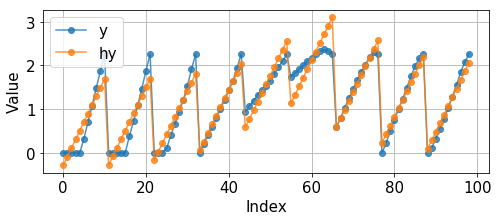

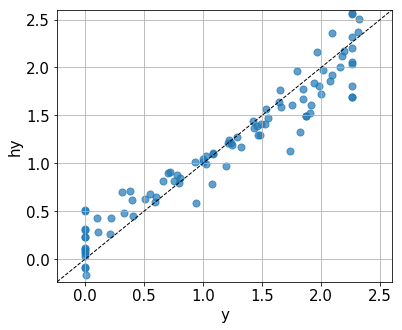

In [5]:
#=== .project(sort=None,normalize=False) ===
# R2        : coefficient of determination
# Q2        : R2 for leave-one-out cross validation.
# AIC       : Akaike information criterion.

# b         : regression coefficient
# -log10(p) : minus log 10 of p-val (importance of descriptor)
# G2        : an importance of descriptor (original criterion)
# TRi2      : strength of near multicollinearity

s1_lid.project()

Exhaustive search for 6 descriptors:  10C6 = 210
   5 %  (11/210)
  10 %  (21/210)
  15 %  (32/210)
  20 %  (42/210)
  25 %  (53/210)
  30 %  (63/210)
  35 %  (74/210)
  40 %  (84/210)
  45 %  (95/210)
  50 %  (105/210)
  55 %  (116/210)
  60 %  (126/210)
  65 %  (137/210)
  70 %  (147/210)
  75 %  (158/210)
  80 %  (168/210)
  85 %  (179/210)
  90 %  (189/210)
  95 %  (200/210)
 100 %  (210/210)

Exhaustive search is finished. 100 %  (210/210)

Elapsed time for score calculatons
time: 0.0469210147857666 [s]
time/10C6 : 0.00022343340374174572 [s/ncomb]

Elapsed time for sorting (by |e|2)
time : 0.0023431777954101562 [s]
time/10C6 : 1.1157989501953124e-05 [s/ncomb]

Displayed only top 20 (sorted by |e|2)
            |e|2           R2           |eq|2           Q2         Descriptors
   0   6.06625   0.90576   7.03491   0.890712    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)']
   1   6.07925   0.905558   7.05912   0.890336    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)']
   2   6.09

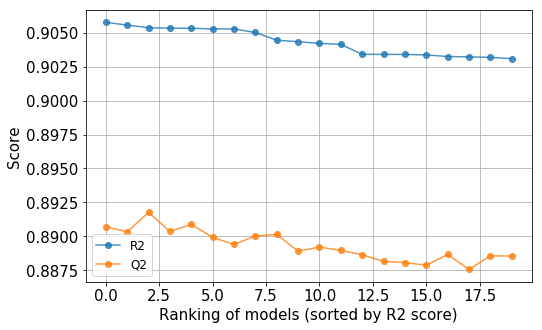

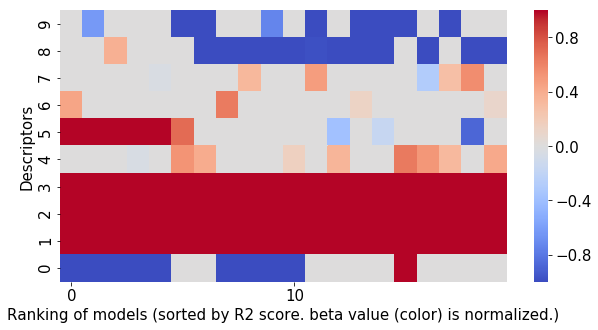


Elapsed time for sorting (by |eq2|)
time : 0.0014731884002685547 [s]
time/10C6 : 7.015182858421689e-06 [s/ncomb]

Displayed only top 20 (sorted by |eq|2)
            |e|2           R2           |eq|2           Q2         Descriptors
   0   6.09164   0.905366   6.967   0.891767    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x4-x7)']
   1   6.09452   0.905321   7.02394   0.890882    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x6+x7)']
   2   6.06625   0.90576   7.03491   0.890712    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)']
   3   6.09381   0.905332   7.05719   0.890366    ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)']
   4   6.07925   0.905558   7.05912   0.890336    ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)']
   5   6.15111   0.904442   7.07162   0.890142    ['x0', 'x1', 'x2', 'x3', 'a(x6+x7)', 'a(x4-x7)']
   6   6.11416   0.905016   7.07882   0.89003    ['x0', 'x1', 'x2', 'x3', 'a(x2+x6)', 'a(x4-x7)']
   7   6.09717   0.90528   7.0856   0.889925    ['x1', 'x2', 'x3', 'x6', 'a(x2-x7)'

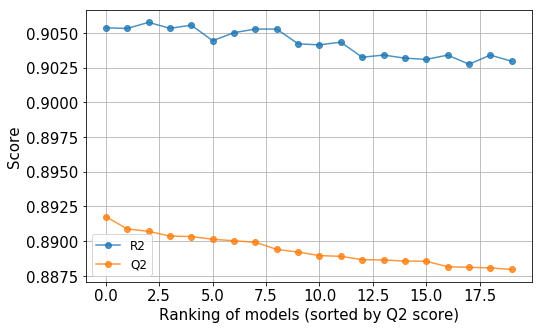

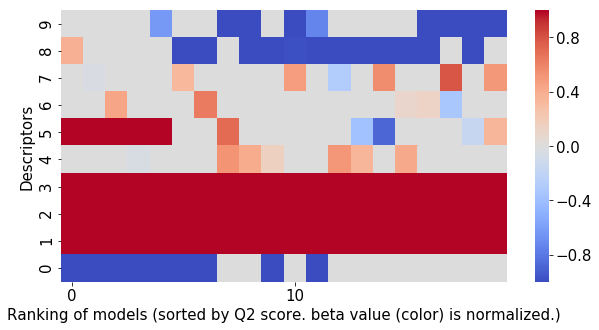

In [6]:
#s1_lid.ex_search(6,ntop=20,const=True)
s1_lid.ex_search(6)

.remove:  all
  s1_lid ( 10 )   -   s1_lid ( 10 )
  s1_lid ( 0 )

.add:  ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x4-x7)']
  s1_lid ( 0 )   +   new ( 6 ) 
  s1_lid ( 6 )

Ordinary Least Squares regression:
  normalize = False
  coefficients are for descriptors with original scale

  e2 =  6.091644
  mse =  0.061532
  rmse =  0.248056
  R2 =  0.905366
  eq2 =  6.967001
  mseq =  0.070374
  rmseq =  0.265281
  Q2 =  0.891767

  TR2, TQ2, AIC =  0.970687,   0.966475,   16.917852

      Label        b      |b|  -log10(p)       G2      TRi2
1        x0 -0.45173  0.45173    1.09326  0.03245  0.989888
2        x1  1.97389  1.97389   41.28549  0.86361  0.714286
3        x2  0.63268  0.63268   11.08850  0.39652  0.786384
4        x3  0.03913  0.03913    3.78977  0.14252  0.896506
5  a(x2-x7)  0.12072  0.12072    0.58940  0.01377  0.968050
6  a(x4-x7)  0.02507  0.02507    0.08258  0.00052  0.978426

hy = (-0.452)x0 + (1.974)x1 + (0.633)x2 + (0.039)x3 + (0.121)a(x2-x7) + (0.025)a(x4-x7)



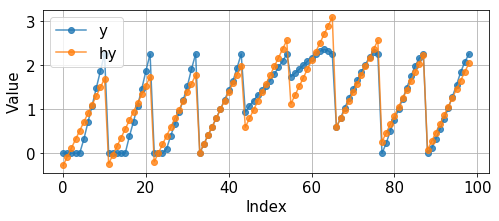

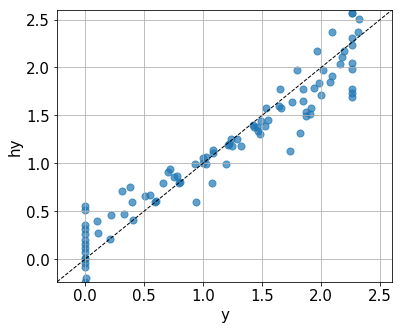

.load:  all
  s1_lid ( 6 )   +   s1_lid_save ( 10 )   in   s1_lid_save ( 10 )
  s1_lid ( 10 )        s1_lid_save ( 10 )

.show: s1_lid ( 10 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)']
    0  x0      (  =  const  )
    1  x1      (  =  x  )
    2  x2      (  =  MA  )
    3  x3      (  =  ZA  )
    4  x6      (  =  MAB  )
    5  a(x2-x7)
    6  a(x2+x6)
    7  a(x6+x7)
    8  a(x4-x7)
    9  a(x3-x5)



In [9]:
q2_top_list = ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x4-x7)']

s1_lid.remove("all")
s1_lid.add(q2_top_list)

s1_lid.project()

s1_lid.load()

Elastic net calculation (by sklearn)
Constant descriptors ['x0'] are ignored.


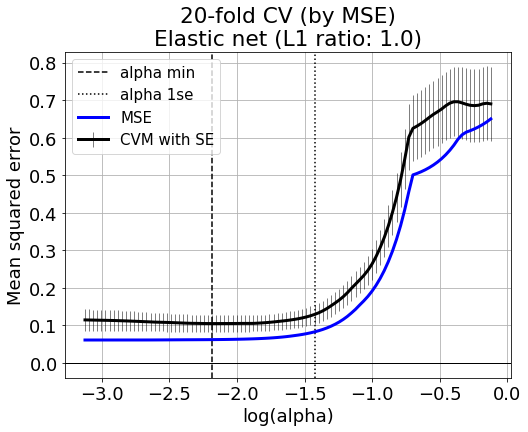

log10(amin)=-2.1834123309982805
log10(a1se)=-1.425836573422523

Normalize = False
  coefficients are for descriptors with original scale

       Label    b_amin  |b_amin|    b_a1se  |b_a1se|
1      const  0.166494  0.166494  0.528519  0.528519
2         x1  1.908342  1.908342  1.598780  1.598780
3         x2  0.396593  0.396593  0.180532  0.180532
4         x3  0.033986  0.033986  0.031028  0.031028
5         x6  0.052456  0.052456  0.060693  0.060693
6   a(x2-x7)  0.000000  0.000000  0.000000  0.000000
7   a(x2+x6)  0.000000  0.000000  0.000000  0.000000
8   a(x6+x7)  0.000000  0.000000  0.023184  0.023184
9   a(x4-x7) -0.052994  0.052994 -0.000000  0.000000
10  a(x3-x5) -0.085605  0.085605 -0.158734  0.158734

Selected descriptors:
At alpha = amin
  R2: 0.90428469402458
  Mean R2 (~Q2): 0.8385111359034889

  Descriptors with a non-zero coefficient ( |b_amin| > 0.0 ) : (7)
    ['const', 'x1', 'x2', 'x3', 'x6', 'a(x4-x7)', 'a(x3-x5)']

  Descriptors with a coefficient |b_amin| >= 0.001

In [10]:
#s1_lid.elastic_net(l1r=1.0,eps=0.001,kf=20,intercept=True,norm=False,itr=1000,zero=0.001)

# "l1r" = 1.0 for LASSO and  "l1r" = 0.0 for Ridge.
# "kf" means fold number for cross validation. 

s1_lid.elastic_net()

.remove:  all
  s1_lid ( 10 )   -   s1_lid ( 10 )
  s1_lid ( 0 )

.add:  ['const', 'x1', 'x2', 'x3', 'x6', 'a(x6+x7)', 'a(x3-x5)']
  s1_lid ( 0 )   +   new ( 7 ) 
  s1_lid ( 7 )

Ordinary Least Squares regression:
  normalize = False
  coefficients are for descriptors with original scale

  e2 =  6.218367
  mse =  0.062812
  rmse =  0.250623
  R2 =  0.903397
  eq2 =  7.283113
  mseq =  0.073567
  rmseq =  0.271232
  Q2 =  0.886856

  TR2, TQ2, AIC =  0.970077,   0.964953,   20.956185

      Label        b      |b|  -log10(p)       G2      TRi2
1     const  0.22007  0.22007    0.16771  0.00186  0.997581
2        x1  1.97389  1.97389   40.49522  0.86117  0.714286
3        x2  0.38523  0.38523    2.03461  0.07139  0.931186
4        x3  0.03479  0.03479    1.27855  0.04020  0.966321
5        x6  0.07602  0.07602    0.27383  0.00425  0.966336
6  a(x6+x7) -0.01283  0.01283    0.06852  0.00037  0.971500
7  a(x3-x5) -0.13045  0.13045    0.86753  0.02404  0.990374

hy = (0.22)const + (1.974)x1 

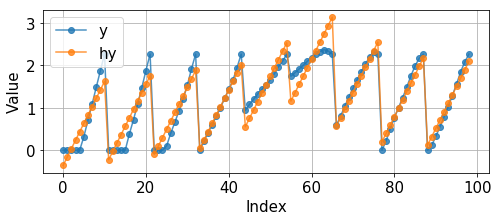

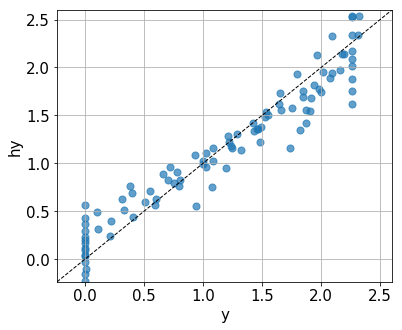

.load:  all
  s1_lid ( 7 )   +   s1_lid_save ( 10 )   in   s1_lid_save ( 10 )
  s1_lid ( 10 )        s1_lid_save ( 10 )



In [11]:
lasso_a1se_list = ['const', 'x1', 'x2', 'x3', 'x6', 'a(x6+x7)', 'a(x3-x5)']

s1_lid.remove("all")
s1_lid.add(lasso_a1se_list)

s1_lid.project()

s1_lid.load()